## Sentiment Analysis

### Import Libraries

In [1]:
# install and import libraries
!pip install textblob
from textblob import TextBlob

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable


### Import Data


In [2]:
from pymongo import MongoClient
client = MongoClient('mongodb://localhost:27017')
db = client.bbcnews
collection = db.articles_processed

In [3]:
articles = pd.DataFrame(list(collection.find()))
articles.head()

,_id,url,date,menu_submenu,title,subtitle,text,n_words,article_clean,n_words_clean
0,630f9948ba4b11ac88ffd7a5,https://www.bbc.com/news/uk-england-bristol-62...,2022-08-29 07:15:16,uk-england-bristol,Bath mother's fight for daughter's life-saving...,The mother of a girl with a rare health condit...,"Isabella, 11, from Bath, suffers from panhypop...",480,isabella bath suffers panhypopituitarism defec...,176
1,630f9948ba4b11ac88ffd7a6,https://www.bbc.com/news/uk-england-gloucester...,2022-08-29 06:34:05,uk-england-gloucestershire,Bourton-on-the-Water tourism charge raises £62k,A tourism charge introduced in a popular Cotsw...,In March 2021 Cotswold District Council (CDC) ...,276,march cotswold district council cdc rissington...,106
2,630f9948ba4b11ac88ffd7a7,https://www.bbc.com/news/uk-england-somerset-6...,2022-08-29 07:02:23,uk-england-somerset,Burnham's Haven Holiday park upgrade approved ...,A performance stage and climbing wall are to b...,Sedgemoor District Council approved the plans ...,344,sedgemoor district council plan holiday park b...,125
3,630f9948ba4b11ac88ffd7a8,https://www.bbc.com/news/world-europe-62710530,2022-08-29 06:26:04,world-europe,Ukraine war: UN team leaves for Zaporizhzhia n...,An inspection team from the UN nuclear watchdo...,"Rafael Grossi, director general of the Interna...",389,rafael grossi director general international a...,150
4,630f9948ba4b11ac88ffd7a9,https://www.bbc.com/news/uk-england-suffolk-62...,2022-08-29 06:29:54,uk-england-suffolk,Johnny Cash: Band in homage to cancelled 1992 ...,Country music star Johnny Cash was due to play...,"Ahead of his performance, Cash said he was loo...",487,ahead performance cash forward favourite part ...,167


### Sentiment Analysis: Polarity and Subjectivity

In [4]:
# sentiment analysis on 'article_clean' column 

articles["date"] = pd.to_datetime(articles["date"])
articles['polarity'] = articles['article_clean'].apply(lambda x : TextBlob(x).sentiment.polarity)
articles['subjectivity'] = articles['article_clean'].apply(lambda x : TextBlob(x).sentiment.subjectivity)

In [6]:
articles.head()

,_id,url,date,menu_submenu,title,subtitle,text,n_words,article_clean,n_words_clean,polarity,subjectivity
0,630f9948ba4b11ac88ffd7a5,https://www.bbc.com/news/uk-england-bristol-62...,2022-08-29 07:15:16,uk-england-bristol,Bath mother's fight for daughter's life-saving...,The mother of a girl with a rare health condit...,"Isabella, 11, from Bath, suffers from panhypop...",480,isabella bath suffers panhypopituitarism defec...,176,0.010733,0.442886
1,630f9948ba4b11ac88ffd7a6,https://www.bbc.com/news/uk-england-gloucester...,2022-08-29 06:34:05,uk-england-gloucestershire,Bourton-on-the-Water tourism charge raises £62k,A tourism charge introduced in a popular Cotsw...,In March 2021 Cotswold District Council (CDC) ...,276,march cotswold district council cdc rissington...,106,0.150397,0.413319
2,630f9948ba4b11ac88ffd7a7,https://www.bbc.com/news/uk-england-somerset-6...,2022-08-29 07:02:23,uk-england-somerset,Burnham's Haven Holiday park upgrade approved ...,A performance stage and climbing wall are to b...,Sedgemoor District Council approved the plans ...,344,sedgemoor district council plan holiday park b...,125,0.037351,0.471032
3,630f9948ba4b11ac88ffd7a8,https://www.bbc.com/news/world-europe-62710530,2022-08-29 06:26:04,world-europe,Ukraine war: UN team leaves for Zaporizhzhia n...,An inspection team from the UN nuclear watchdo...,"Rafael Grossi, director general of the Interna...",389,rafael grossi director general international a...,150,0.100121,0.390848
4,630f9948ba4b11ac88ffd7a9,https://www.bbc.com/news/uk-england-suffolk-62...,2022-08-29 06:29:54,uk-england-suffolk,Johnny Cash: Band in homage to cancelled 1992 ...,Country music star Johnny Cash was due to play...,"Ahead of his performance, Cash said he was loo...",487,ahead performance cash forward favourite part ...,167,0.091230,0.444616


### Save Data

In [ ]:
# save data to mongo collection

db['articles_sentiments_12'].insert_many(articles[['url', 'date', 'title', 'polarity', 'subjectivity']].to_dict('records'))

In [8]:
articles['date'] = articles['date'].dt.to_period('D')

### Plots of Polarity Over Time 

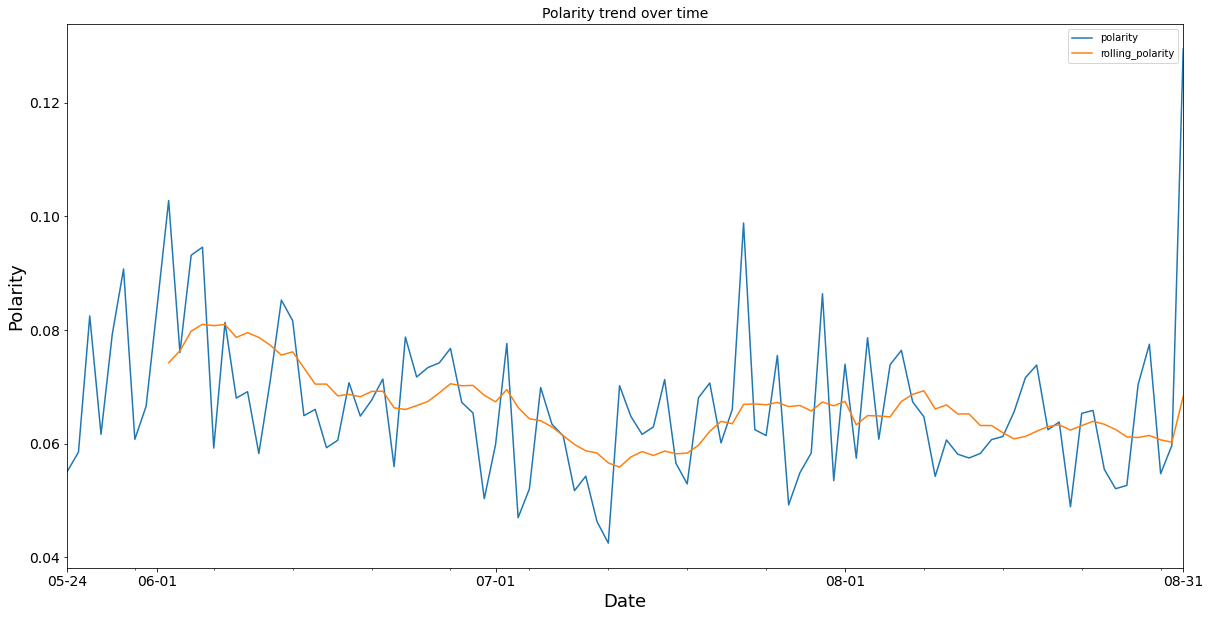

In [18]:
df = articles[["date", "polarity", "subjectivity"]].groupby("date").mean().reset_index()
df['rolling_polarity'] = df.polarity.rolling(window=10).mean()
df['rolling_subjectivity'] = df.subjectivity.rolling(window=10).mean()
ax = df.plot(x="date", 
        y=["polarity", "rolling_polarity"], 
        figsize=(20, 10), 
        fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel("Date", fontsize=18)
plt.ylabel("Polarity", fontsize=18)
plt.title("Polarity trend over time", fontsize=14)
plt.show()

### Plot of Subjectivity Over Time

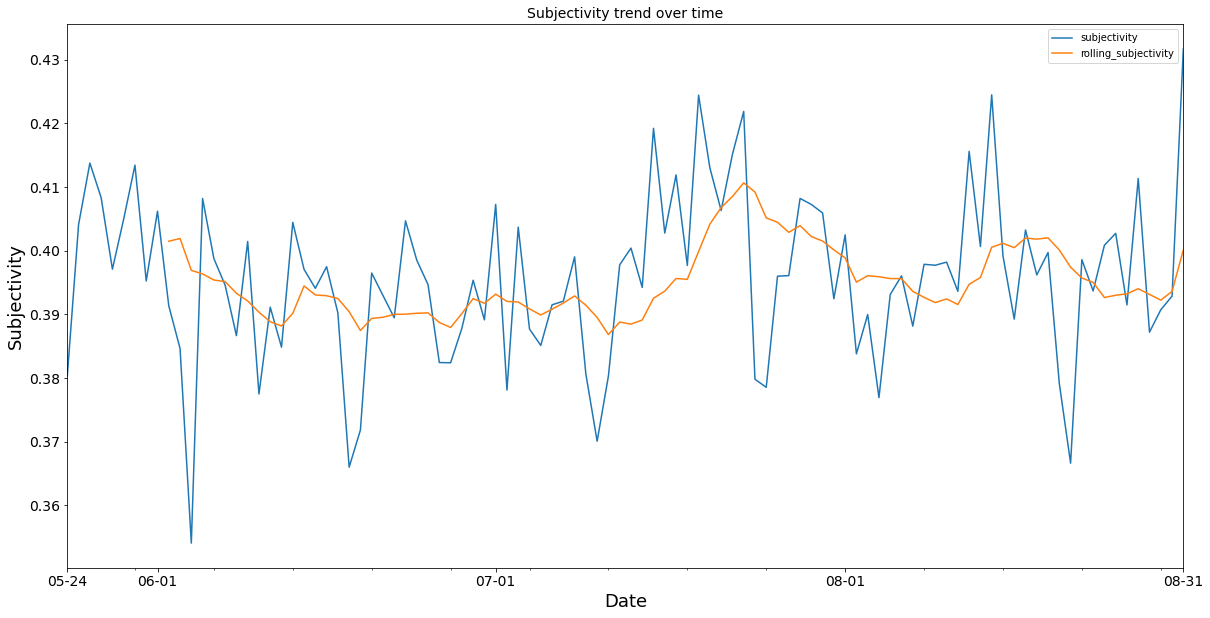

In [20]:
ax = df.plot(x="date", 
        y=["subjectivity", "rolling_subjectivity"], 
        figsize=(20, 10), 
        fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel("Date", fontsize=18)
plt.ylabel("Subjectivity", fontsize=18)
plt.title("Subjectivity trend over time", fontsize=14)
plt.show()